<div style="text-align: center;">
    <img src="docs/images/despliegue.png" alt="Despliegue" width="900"/>
    <h1>Análisis exploratorio y limpieza de datos para el diagnóstico de accidentes cerebrovasculares</h1>
</div>


# Importación de librerías:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Cargue de datos:


In [2]:
# Leer archivos csv
def leer_archivos (path):
    """
    Lee un archivo csv y retorna un dataframe
    :param path: str: path del archivo csv
    :return: DataFrame: dataframe con los datos del archivo
    """
    df = pd.read_csv(path)
    return df

df_original = leer_archivos("data/raw/healthcare-dataset-stroke-data.csv")

# Análisis Descriptivo de los conjuntos de datos
### <b> Vista general del DataFrame de healthcare-dataset-stroke-data: </b> Dimensiones y diccionario de datos

In [3]:
print('Dimensiones dataframe:', df_original.shape)
print('Información: ')
print('-'*30)
print(df_original.info())
df_original.head()

Dimensiones dataframe: (5110, 12)
Información: 
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


El dataframe **healthcare-dataset-stroke-data** contiene información detallada de 5110 personas con diferentes características, en total, 10 características (columnas) y su respectivo índice. Para ampliar la información de cada una de estas características, pueden consultar el diccionario de datos en: [Diccionario de datos Dataframe healthcare-dataset-stroke-data](https://github.com/paulguz261/MIAD_20242_proyecto_despliegue_aplicaciones/blob/main/docs/tables/personas.md).

# Validación de valores nulos:

In [4]:
def evaluar_nulos(df, columnas):
    """
    Evalúa los valores nulos en las columnas especificadas de un DataFrame.
    
    Parámetros:
    df (pd.DataFrame): El DataFrame que contiene los datos.
    columnas (list): Lista de nombres de columnas a evaluar.
    
    Retorna:
    pd.DataFrame: DataFrame con la cantidad de valores nulos para cada columna especificada.
    """
    #Primero miramos si las columnas existen
    columnas_existentes = [col for col in columnas if col in df.columns]
    
    #Resultados
    nulos = df[columnas_existentes].isnull().sum()
    nulos_df = pd.DataFrame({
        'Columna': nulos.index,
        'Nulos': nulos.values
    }).sort_values(by='Nulos', ascending=False)
    
    return nulos_df

def visualizar_nulos(df):
    """
    Visualiza los valores nulos en un DataFrame utilizando un diagrama de calor.

    Parámetros:
    df (pd.DataFrame): El DataFrame que contiene los datos.
    """
    #Máscara booleana para los valores nulos
    nulos_mascara = df.isnull()
    
    #Diagrama de calor
    plt.figure(figsize=(12, 8))
    sns.heatmap(nulos_mascara, cbar=False, cmap='viridis', yticklabels=False, xticklabels=df.columns)
    
    #Etiquetas y título
    plt.title('Diagrama de Calor de Valores Nulos')
    plt.xlabel('Columnas')
    plt.ylabel('Índices')
    plt.show()

def graficar_histograma(df, column_name):
    # Verifica que la columna existe en el DataFrame
    if column_name in df.columns:
        # Generar gráfico de barras horizontales para variables categóricas
        if pd.api.types.is_categorical_dtype(df[column_name]) or df[column_name].dtype == 'object':
            plt.figure(figsize=(10, 6))
            sns.countplot(y=df[column_name], palette='viridis', order=df[column_name].value_counts().index)
            plt.title(f'Distribución de {column_name}')
            plt.xlabel('Frecuencia')
            plt.ylabel(column_name)
        # Generar histograma para variables numéricas
        else:
            plt.figure(figsize=(10, 6))
            # Usamos un color específico de la paleta viridis
            color_viridis = sns.color_palette('viridis', as_cmap=True)(0.6)  # Selecciona un color de la paleta
            sns.histplot(df[column_name], bins=20, color=color_viridis)
            plt.title(f'Histograma de {column_name}')
            plt.xlabel(column_name)
            plt.ylabel('Frecuencia')

        plt.tight_layout()  # Ajusta el diseño del gráfico
        plt.show()
    else:
        print(f"La columna '{column_name}' no existe en el DataFrame.")

def obtener_frecuencia_valores(df, column_name):
    """
    Esta función recibe un DataFrame y el nombre de una columna, 
    y devuelve la frecuencia de cada valor único en esa columna.

    Parámetros:
    df: DataFrame de pandas
    column_name: str, nombre de la columna

    Retorno:
    Serie de pandas con los valores únicos y sus frecuencias
    """
    # Obtener la frecuencia de los valores únicos
    frecuencia_valores_unicos = df[column_name].value_counts()

    # Retornar las frecuencias
    return frecuencia_valores_unicos

In [5]:
evaluar_nulos(df_original, df_original.columns)

,Columna,Nulos
9,bmi,201
0,id,0
1,gender,0
2,age,0
3,hypertension,0
4,heart_disease,0
5,ever_married,0
6,work_type,0
7,Residence_type,0
8,avg_glucose_level,0


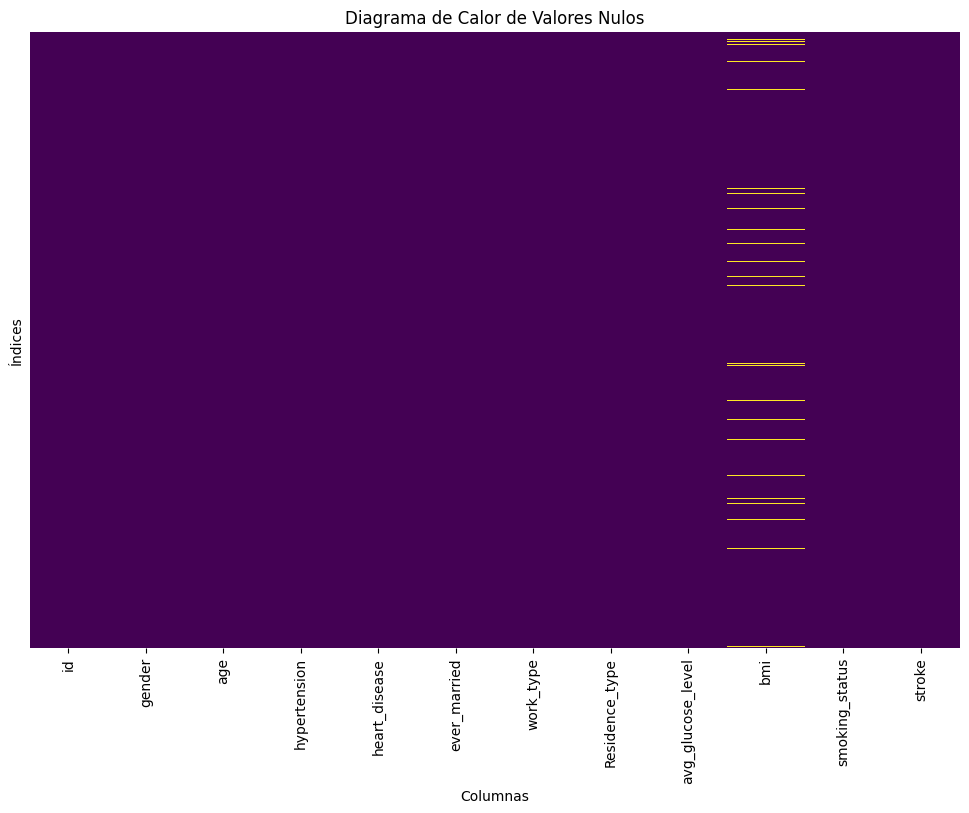

In [6]:
visualizar_nulos(df_original)

* **`bmi`:** La columna tiene un número bajo de valores nulos (201). Esto sugiere que una pequeña proporción de personas no pudo o no quiso proporcionar un valor específico de datos para calcular su índice de masa corporal.

* Las columnas restantes del dataframe no presentan valores nulos: `id`, `gender`, `age`, `hypertension`, `heart_disease`, `ever_married`, `work_type`, `Residence_type`, `avg_glucose_level`, `smoking_status`, `stroke`

# Configurar un índice:
Configuramos como índice el id único de las personas. De esta manera, será fácil identificarlas.

In [7]:
df_original.set_index("id",inplace=True)

# Conversión de variables Categóricas:
Para mejorar el análisis del DataFrame `healthcare-dataset-stroke-data`, es necesario convertir ciertas variables a tipo categórico. Variables como `gender`, `hypertension`, `heart_disease`, `ever_married`, `work_type`, `Residence_type`,`smokin_status` y `stroke` se convierten a categóricas para facilitar la segmentación y comparación de datos en distintas categorías. Además, esta conversión optimiza el análisis de los datos, permitiendo aplicar técnicas estadísticas y de machine learning adecuadas para variables categóricas.

In [8]:
def convert_to_categorical(df, columns):
    """
    Convierte las columnas especificadas de un DataFrame a tipo categórico.

    Parámetros:
    df (pd.DataFrame): El DataFrame en el que se realizarán las conversiones.
    columns (list): Lista de nombres de columnas a convertir a tipo categórico.

    Retorna:
    pd.DataFrame: El DataFrame con las columnas especificadas convertidas a tipo categórico.
    """
    for column in columns:
        if column in df.columns:
            df[column] = pd.Categorical(df[column])
        else:
            print(f"Columna '{column}' no encontrada en el DataFrame.")
    return df

categorical_columns = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status','stroke']
df_original = convert_to_categorical(df_original, categorical_columns)

# Tratamiento de valores nulos: bmi
Como pudimos ver, la columna `bmi` que se refiere al índice de masa corporal cuenta con 201 valores nulos (Aproximadamente el 3% de la muestra).
Por lo tanto, para no perder esta información, aplicaremos un enfoque de imputación de datos con respecto a la media:

In [9]:
# Imputar con la media
df_original['bmi'].fillna(df_original['bmi'].mean(), inplace=True)

# Existe la imputación con la mediana y con otros métodos como predicción a partir de modelos, pero al ser tan pocos datos, la media es una buena opción:
# df_original['bmi'].fillna(df_original['bmi'].median(), inplace=True)

# También podríamos imputarlo por medio de otra columna, pero en este caso solo lo tendremos como una opción:
# por ejemplo por género:
# df_original['bmi'] = df_original.groupby('gender')['bmi'].transform(lambda x: x.fillna(x.median()))

# Estadísticas Descriptivas:
Primero veamos cómo se comportan las variables categóricas:

In [10]:
print("Estadísticas descriptivas variables categóricas:")
df_original.select_dtypes(include=['object', 'category']).describe()

Estadísticas descriptivas variables categóricas:


,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke
count,5110,5110,5110,5110,5110,5110,5110,5110
unique,3,2,2,2,5,2,4,2
top,Female,0,0,Yes,Private,Urban,never smoked,0
freq,2994,4612,4834,3353,2925,2596,1892,4861


Aquí nos podemos darnos cuenta de que las categorías de las variables categóricas van desde 2 categorías a 5 (la mayor sería `work_type`).

Veamos esto gráficamente:

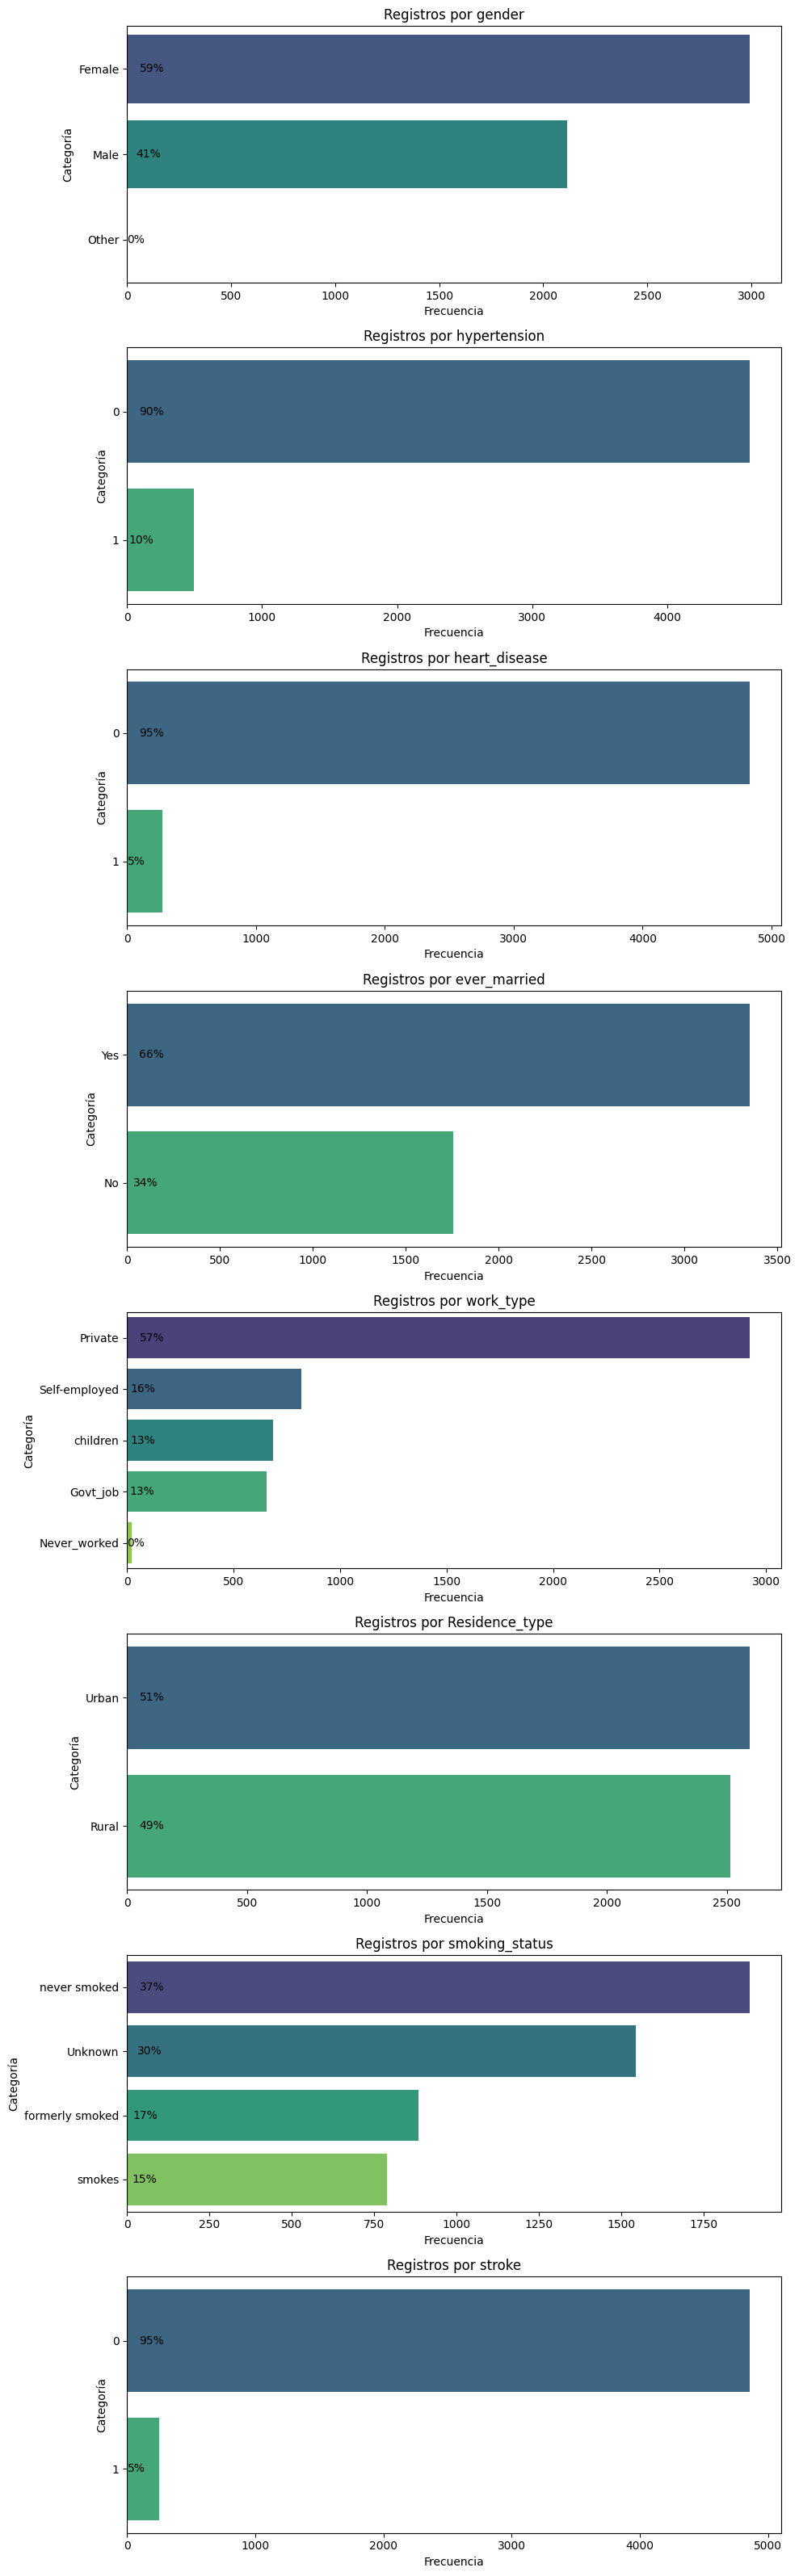

In [11]:
# Crear una figura con subplots
fig, axs = plt.subplots(len(df_original.select_dtypes(include=['object', 'category']).columns), 1, figsize=(10, len(df_original.select_dtypes(include=['object', 'category']).columns) * 4))

# Graficar la participación de cada categoría en cada variable
for i, col in enumerate(df_original.select_dtypes(include=['object', 'category']).columns):
    sns.countplot(y=col, data=df_original, ax=axs[i], order=df_original[col].value_counts().index, palette='viridis')
    axs[i].set_title(f'Registros por {col}')
    axs[i].set_ylabel('Categoría')
    axs[i].set_xlabel('Frecuencia')

    # Añadir el porcentaje de participación en cada categoría
    for j, value in enumerate(df_original[col].value_counts(normalize=True) * 100):
        axs[i].text(value + 1, j, f'{value:.0f}%', va='center')

plt.tight_layout()
plt.show()

Podemos destacar las siguientes características de las personas en las variables categóricas:

* Evidenciamos que hay más mujeres (59%) que hombres (41%) en la captura de la información.
* Notamos que en las variables `hypertension` y `heart_disease` predomina con más de un 90% las personas que no tienen o han tenido estas condiciones.
* Evidenciamos que hay más personas que alguna vez se han casado (66%) que las que no (34%) en la captura de la información.
* Evidenciamos que la mayoría de las personas de la muestra trabajan en empresa privada.
* Evidenciamos que la mayoría de personas nunca han fumado.
* Evidenciamos que hay una muestra muy equilibrada entre si el tipo de residencia es rural o urbana.
* Finalmente, evidenciamos que nuestra variable predictora `stroke`, presenta un desbalanceo de clases del 95% (si) al 5% (no).

In [12]:
print("Estadísticas descriptivas variables númericas:")
df_original.describe()

Estadísticas descriptivas variables númericas:


,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,5110.000000
mean,43.226614,106.147677,28.893237
std,22.612647,45.283560,7.698018
min,0.080000,55.120000,10.300000
25%,25.000000,77.245000,23.800000
50%,45.000000,91.885000,28.400000
75%,61.000000,114.090000,32.800000
max,82.000000,271.740000,97.600000


Podemos destacar las siguientes características de las personas en las variables categóricas:
* Respecto a la edad, tenemos una media de encuestados de adultos que rondan los 43 años. Esta edad es de adultos medios. Además, podemos evidenciar que se cuenta con una desviación estándar alta para la muestra, por lo que está distribuida hacia los extremos.
* Respecto al nivel de glucosa, podemos evidenciar que también cuenta con una desviación estándar alta. Por otra parte, vemos que la glucosa supera los 100, lo que puede indicar que en promedio, la gente sufre de pre-diabetes.
* Al ver el índice de masa corporal, podemos evidenciar que en promedio, la gente se encuentra en sobrepeso (Si su IMC es entre 25.0 y 29.9, se encuentra dentro del rango de sobrepeso).

### Distribución de variables numéricas y sus relaciones:
Primero veamos las relaciones y los histogramas:

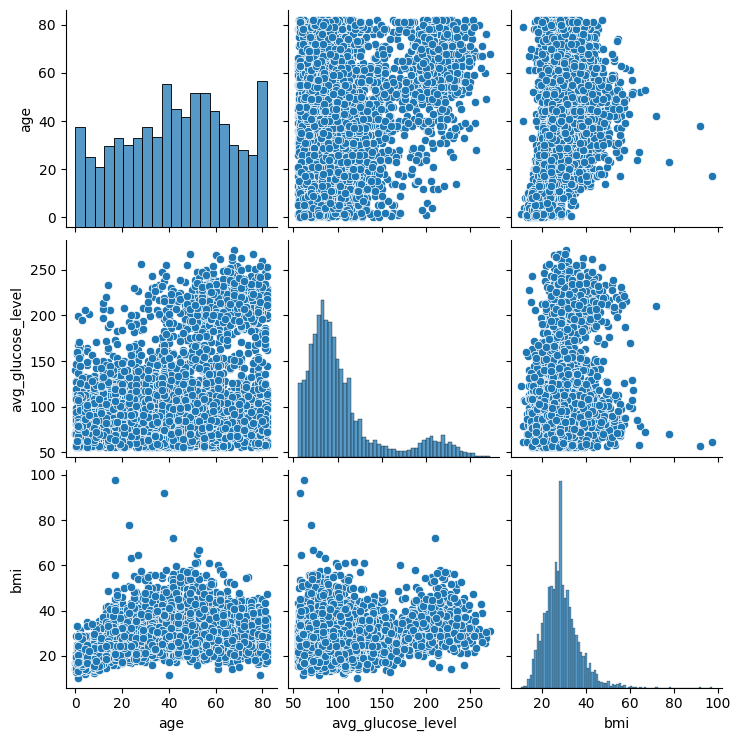

In [13]:
sns.pairplot(df_original)

Ahora veamos acerca de la distribución de los datos por medio de BoxPlots:

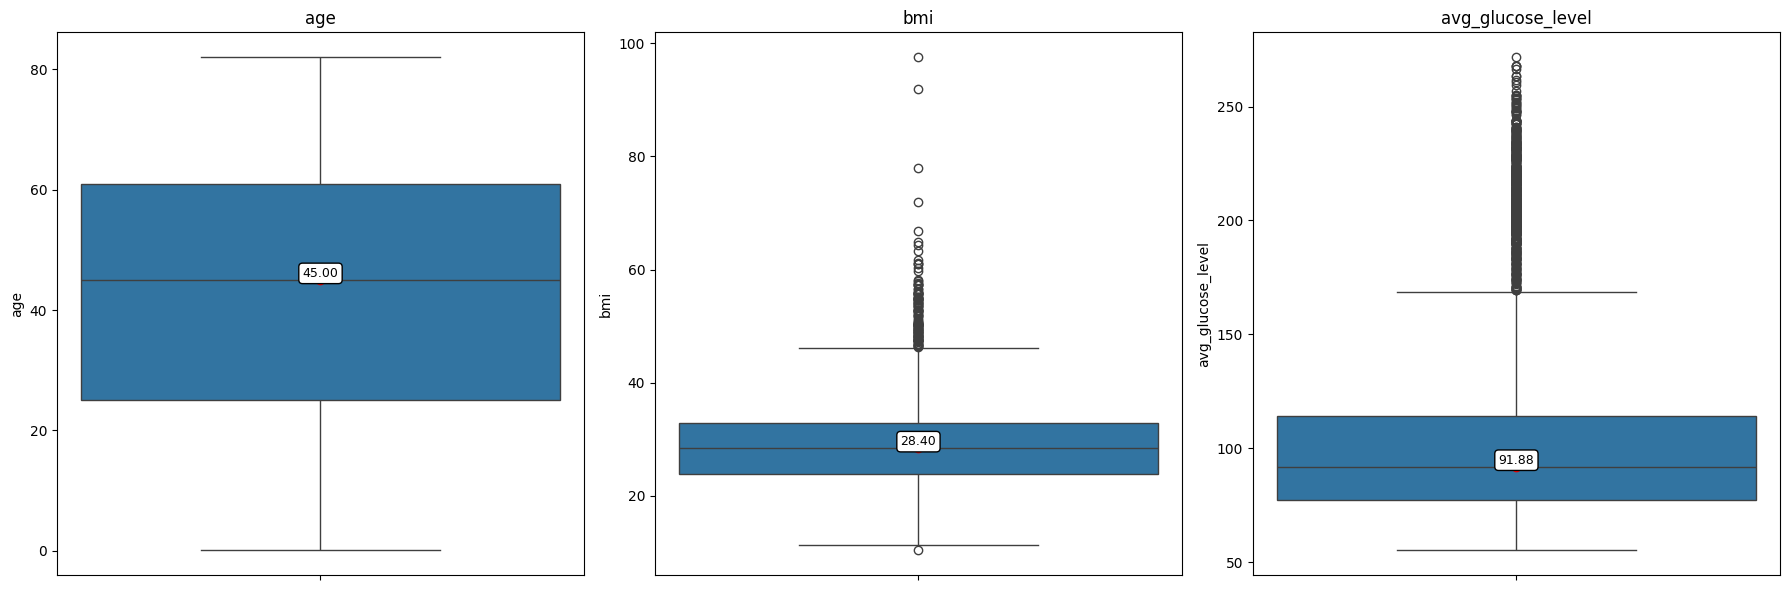

In [14]:
# Boxplots para ver la distribución de los datos
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # Cambiamos a (1, 3) para 3 gráficos
columns_to_plot = ["age", "bmi", "avg_glucose_level"]

for i, column in enumerate(columns_to_plot):
    sns.boxplot(y=df_original[column], ax=axes[i])

    # Mediana (Q2)
    Q2 = np.percentile(df_original[column].dropna(), 50)
    axes[i].plot(0, Q2, 'o', color='red')
    axes[i].text(0, Q2, f'{Q2:.2f}', ha='center', va='bottom', color='black', fontsize=9,
                 bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

    # Títulos
    axes[i].set_title(column)

# Mostrar figura
plt.tight_layout()
plt.show()

,age,avg_glucose_level,bmi
age,1.000000,0.238171,0.325942
avg_glucose_level,0.238171,1.000000,0.168751
bmi,0.325942,0.168751,1.000000


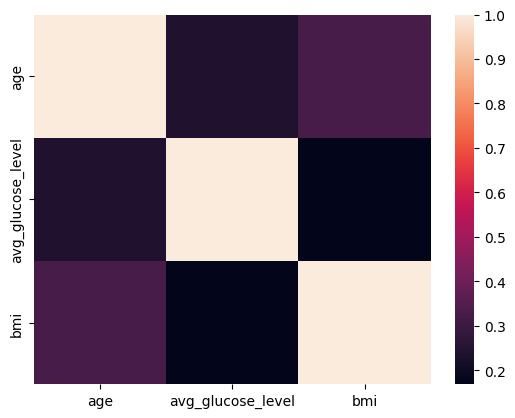

In [15]:
#Correlaciones
sns.heatmap(df_original.select_dtypes("float").corr(),annot=True, linewidths=.5)
df_original.select_dtypes("float").corr()

De este análisis podemos evidenciar que:
* La edad tiene una distribución semi-uniforme. Sin embargo, hay picos en algunas edades.
* El nivel de glucosa vemos que tiene muchos outliers, referente a personas con los niveles altos de glucosa.
* En el BMI podemos ver una distribución que es aparentemente normal.
* las variables numéricas no muestran una correlación clara ni problemas de multicolinealidad.

## Generación del nuevo DataFrame de datos para el modelado: `df_personas`.
Ahora contamos con un dataframe con la categorías correctas y con los valores nulos tratados. Procederemos a exportarlo para tener el dataframe limpio:

In [16]:
# Exportar el DataFrame a CSV
df_original.to_csv('data/clean/personas_limpio.csv', index=False)